# **Loading data and packages**

**Libraries import**

In [3]:
# Bibliotecas padrão
import os

# Manipulação de dados
import numpy as np
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Widgets interativos
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

# Salvamento e carregamento de modelos
from joblib import load, dump

# Machine Learning - Pré-processamento e Modelos
from sklearn.model_selection import (
    train_test_split, LeaveOneOut, cross_validate, 
    learning_curve, cross_val_predict
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, 
    GradientBoostingClassifier, ExtraTreesClassifier
)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)

# Métricas de Avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, make_scorer, 
    confusion_matrix, classification_report, roc_curve, auc
)

# Balanceamento de Dados
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTENC, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.metrics import geometric_mean_score


**Data import**

In [4]:
# Defining global variables to store the DataFrame and dataset name
df = pd.DataFrame()
dataset_name = None
X = None
y = None
balancing_method_selected = None  

# Function to list CSV files in the directory
def list_csv_files(directory):
    return [f for f in os.listdir(directory) if f.endswith('.csv')]

# Function to load and process the selected dataset
def load_and_process_data(selected_file):
    global df, dataset_name, X, y
    dataset_name = selected_file
    file_path = os.path.join('..', 'datasets', 'feature_selection', dataset_name)

    if not os.path.exists(file_path):
        print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
        return None

    df = pd.read_csv(file_path)

    # Defining X (features) and y (target)
    X = df.drop(columns=['HAM/TSP']) 
    y = df['HAM/TSP'] 

    print(f"Data Loaded and Processed Successfully! Dataset: {dataset_name}")
    return df.head()

# Function to define the selected balancing method
def set_balancing_method(method):
    global balancing_method_selected  
    balancing_method_selected = method  
    print(f"Método de balanceamento selecionado: {balancing_method_selected}")

# Function to apply the selected balancing method
def apply_balancing(X, y):
    global balancing_method_selected
    if balancing_method_selected is None:
        print("Nenhum método de balanceamento foi selecionado.")
        return X, y

    if balancing_method_selected == 'Random Over Sampler':
        balancer = RandomOverSampler(random_state=42)
    elif balancing_method_selected == 'SMOTENC':
        # Dynamically adjust categorical columns for SMOTENC
        categorical_columns = [col for col in X.columns if col != 'Age']
        categorical_features = [X.columns.get_loc(col) for col in categorical_columns]
        balancer = SMOTENC(categorical_features=categorical_features, random_state=42)
    elif balancing_method_selected == 'Random Under Sampler':
        balancer = RandomUnderSampler(random_state=42)
    elif balancing_method_selected == 'Tomek Links':
        balancer = TomekLinks()
    else:
        print(f"Método de balanceamento desconhecido: {balancing_method_selected}")
        return X, y

    # Applying the balancing method
    X_res, y_res = balancer.fit_resample(X, y)
    return X_res, y_res

# Define the directory where the CSV files are located
directory = '..\\datasets\\feature_selection\\'

# List the CSV files available in the directory
csv_files = list_csv_files(directory)

# Create a selection widget with the files listed
file_selector = widgets.Dropdown(
    options=csv_files,
    description='Select File:'
)

# Create a widget to select the balancing method
balancing_methods = ['Random Over Sampler', 'SMOTENC', 'Random Under Sampler', 'Tomek Links']
method_selector = widgets.Dropdown(
    options=balancing_methods,
    description='Balancing Method:'
)

# Interactive function to load and process the selected CSV file
@interact(selected_file=file_selector)
def load_and_process_selected_file(selected_file):
    return load_and_process_data(selected_file)

# Interactive function to apply the selected balancing method
@interact(selected_method=method_selector)
def apply_selected_balancing_method(selected_method):
    set_balancing_method(selected_method)
    X_res, y_res = apply_balancing(X, y)  
    print(f"Shape dos dados balanceados: {X_res.shape}, {y_res.shape}")


interactive(children=(Dropdown(description='Select File:', options=('df_Clinical_data_ROS.csv', 'df_Clinical_d…

interactive(children=(Dropdown(description='Balancing Method:', options=('Random Over Sampler', 'SMOTENC', 'Ra…

#  **Definition of variables, models and metrics**

**Define the variables (X and y) and classifiers** 

In [5]:
# List of model names that have been adjusted
model_names = ['DT', 'GB', 'LR', 'MLP', 'NB', 'RF', 'SVM', 'KNN', 'AB', 'LSVM']

# Directory where models and results are saved
model_dir = '..\\models\\'

# Dictionary to store loaded templates
classifiers = {}

# Function for loading templates
def load_model(model_name):
    model_path = os.path.join(model_dir, f'best_{model_name}_model.joblib')

    if os.path.exists(model_path):
        # Load the model
        model = load(model_path)

        
        if isinstance(model, SVC):
            model.probability = True

        # Add the model to the classifiers dictionary using the corresponding name
        classifiers[model_name] = model

        print(f'Modelo {model_name} carregado com sucesso.')
    else:
        print(f'Arquivo para o modelo {model_name} não encontrado.')

# Iterate over all the model names and load them
for model_name in model_names:
    load_model(model_name)

Modelo DT carregado com sucesso.
Modelo GB carregado com sucesso.
Modelo LR carregado com sucesso.
Modelo MLP carregado com sucesso.
Modelo NB carregado com sucesso.
Modelo RF carregado com sucesso.
Modelo SVM carregado com sucesso.
Modelo KNN carregado com sucesso.
Modelo AB carregado com sucesso.
Modelo LSVM carregado com sucesso.


In [14]:
print(balancing_method_selected)

TomekLinks()


# **Model evaluation**

Generation of the results

In [6]:
# List to store the results
results = []

# Define the Leave-One-Out strategy
loo = LeaveOneOut()

# Function to apply the selected balancing method
def get_balancing_method():
    global balancing_method_selected
    if balancing_method_selected == 'Random Over Sampler':
        return RandomOverSampler(random_state=42)
    elif balancing_method_selected == 'SMOTENC':
        categorical_columns = [col for col in X.columns if col != 'Idade_clinica']
        categorical_features = [X.columns.get_loc(col) for col in categorical_columns]
        return SMOTENC(categorical_features=categorical_features, random_state=42)
    elif balancing_method_selected == 'Random Under Sampler':
        return RandomUnderSampler(random_state=42)
    elif balancing_method_selected == 'Tomek Links':
        return TomekLinks()
    else:
        print("Nenhum método de balanceamento válido selecionado.")
        return None

# Create the folder to save the predictions, if it doesn't exist
predictions_dir = '../predictions/'
os.makedirs(predictions_dir, exist_ok=True)

# Iterating on the classifiers
for clf_name, clf in classifiers.items():
    
    # Getting the selected balancing method
    balancing_method = get_balancing_method()
    
    if balancing_method is None:
        print(f"Erro: Nenhum método de balanceamento válido para o classificador {clf_name}. Pulando este classificador.")
        continue

    # Define the pipeline using imblearn's Pipeline
    pipeline = Pipeline([
        ('balancing', balancing_method),
        ('classifier', clf)
    ])
    
    # Make predictions with Leave-One-Out
    y_pred = cross_val_predict(pipeline, X, y, cv=loo)
    
    # Calculate the true labels
    y_true = y.values  # As labels verdadeiras

    # Dealing with classifiers that don't support `predict_proba`
    try:
        y_prob = cross_val_predict(pipeline, X, y, cv=loo, method='predict_proba')[:, 1]
    except AttributeError:
        if hasattr(clf, "decision_function"):
            y_prob = cross_val_predict(pipeline, X, y, cv=loo, method='decision_function')
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
        else:
            y_prob = np.zeros_like(y_pred)

    # Calculate test metrics
    test_scores = {
        'classifier': clf_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_prob),
        'G-Mean': geometric_mean_score(y_true, y_pred)
    }

    # Add to results list
    results.append(test_scores)
    
    # Save predictions and true labels in a CSV file
    predictions_df = pd.DataFrame({'True Labels': y_true, 'Predictions': y_pred})  # Incluindo as labels verdadeiras
    predictions_file_path = os.path.join(predictions_dir, f'predictions_{clf_name}_clinic.csv')
    predictions_df.to_csv(predictions_file_path, index=False)

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converge

  classifier  Accuracy  Precision  Recall        F1   ROC AUC    G-Mean
0         DT  0.809917   0.742857   0.650  0.693333  0.618519  0.760117
1         GB  0.752066   0.613636   0.675  0.642857  0.829012  0.730297
2         LR  0.785124   0.750000   0.525  0.617647  0.750926  0.692553
3        MLP  0.809917   0.742857   0.650  0.693333  0.770370  0.760117
4         NB  0.735537   0.617647   0.525  0.567568  0.706019  0.663883
5         RF  0.785124   0.684211   0.650  0.666667  0.803395  0.744113
6        SVM  0.719008   0.560000   0.700  0.622222  0.703395  0.714056
7        KNN  0.801653   0.807692   0.525  0.636364  0.774383  0.701849
8         AB  0.776860   0.696970   0.575  0.630137  0.795988  0.709938
9       LSVM  0.785124   0.675000   0.675  0.675000  0.780556  0.752773


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to sup

Heatmap plot

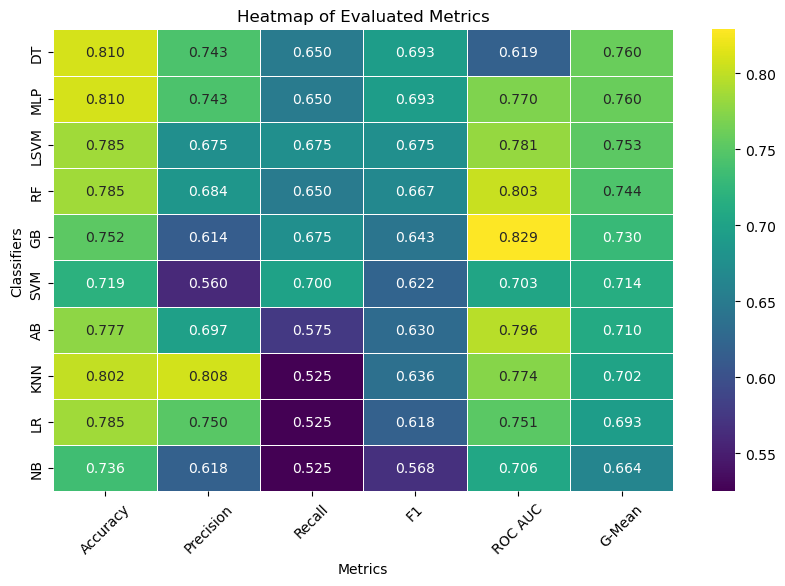

In [7]:
# Defining the names of evaluation metrics
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'G-Mean']

# Selecting the metrics for the heatmap and configuring the index
heatmap_df = results_df[metric_names].set_index(results_df['classifier'])

# Sorting the DataFrame by G-Mean value
heatmap_df = heatmap_df.sort_values(by='G-Mean', ascending=False)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Heatmap of Evaluated Metrics')
plt.xlabel('Metrics')
plt.ylabel('Classifiers')
plt.xticks(rotation=45)
plt.savefig('..\\results\\heatmap.jpeg')
plt.show()


Learning Curves

In [8]:
# Define the balancing strategy as a valid object
balancing_method_selected = TomekLinks()


In [11]:
def plot_learning_curve(X, y, classifiers, balancing_method_selected, train_sizes=np.linspace(0.1, 1.0, 10)):
    results_dir = '..\\results\\'
    
    # Make sure the results directory exists
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    for name, clf in classifiers.items():
        pipeline = Pipeline([
            ('balancing', balancing_method_selected),  
            ('classifier', clf)  
        ])
        
        # Calculating learning curves
        train_sizes_abs, train_scores, test_scores = learning_curve(
            pipeline, X, y, train_sizes=train_sizes, cv=loo, scoring='accuracy', n_jobs=-1
        )

        # Calculating the averages and standard deviations of training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plotting the learning curves
        plt.figure()
        plt.title(f'Learning curve - {name}')
        plt.xlabel("Training samples")
        plt.ylabel("Accuracy")

        plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", label="Training")
        plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", label="Test")

        # Filling in error areas
        plt.fill_between(train_sizes_abs, 
                         train_scores_mean - train_scores_std, 
                         train_scores_mean + train_scores_std, 
                         alpha=0.1, color="r")
        plt.fill_between(train_sizes_abs, 
                         test_scores_mean - test_scores_std, 
                         test_scores_mean + test_scores_std, 
                         alpha=0.1, color="g")

        plt.legend(loc="best")
        plt.grid(True)
        
        # Saving the plot
        plot_filename = os.path.join(results_dir, f'curva_aprendizado_{name}.png')
        plt.savefig(plot_filename)
        plt.close() 



plot_learning_curve(X, y, classifiers, balancing_method_selected)


Confusion matrix with LOOCV and balancing method to prediction, but just the original samples in the plot

Método de balanceamento desconhecido: TomekLinks()


Predicted labels distribution for DT: [86 35]


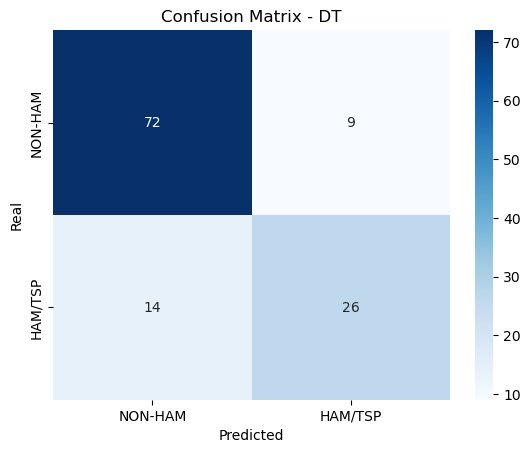

Método de balanceamento desconhecido: TomekLinks()
Predicted labels distribution for GB: [78 43]


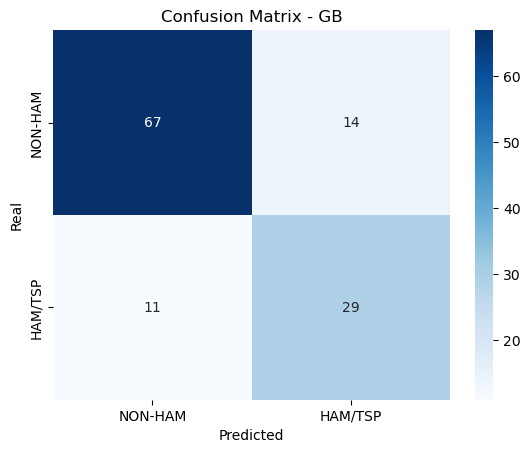

Método de balanceamento desconhecido: TomekLinks()
Predicted labels distribution for LR: [96 25]


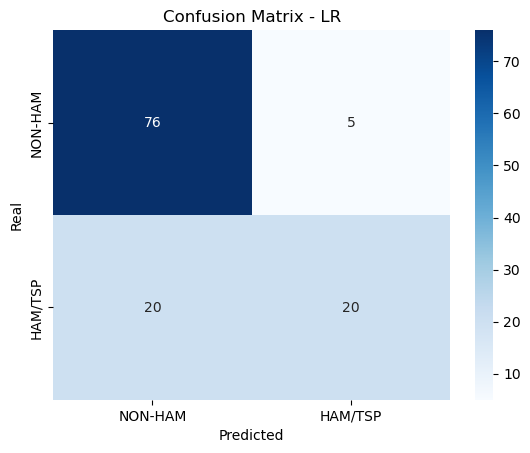

Método de balanceamento desconhecido: TomekLinks()


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converge

Predicted labels distribution for MLP: [86 35]


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (886) reached and the optimization hasn't converged yet.
  warnings.warn(


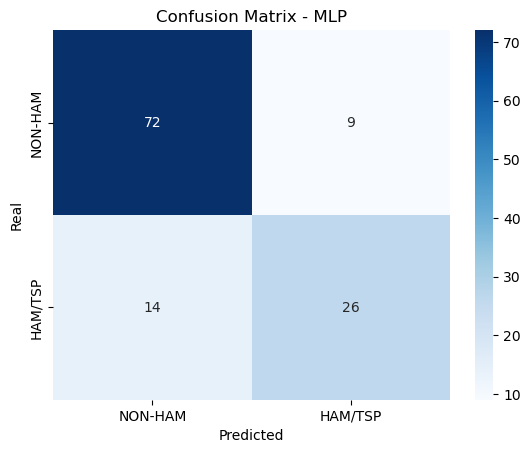

Método de balanceamento desconhecido: TomekLinks()
Predicted labels distribution for NB: [84 37]


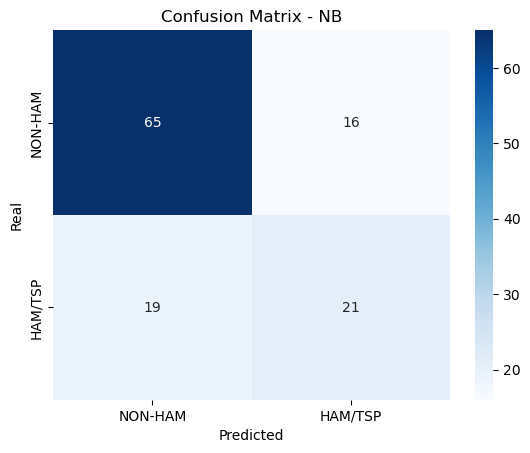

Método de balanceamento desconhecido: TomekLinks()
Predicted labels distribution for RF: [83 38]


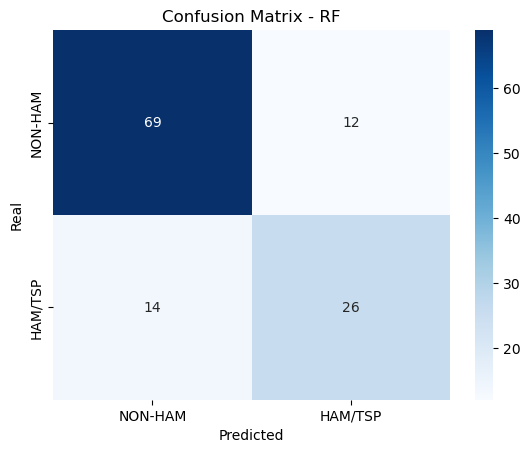

Método de balanceamento desconhecido: TomekLinks()


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=449).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML

Predicted labels distribution for SVM: [81 40]


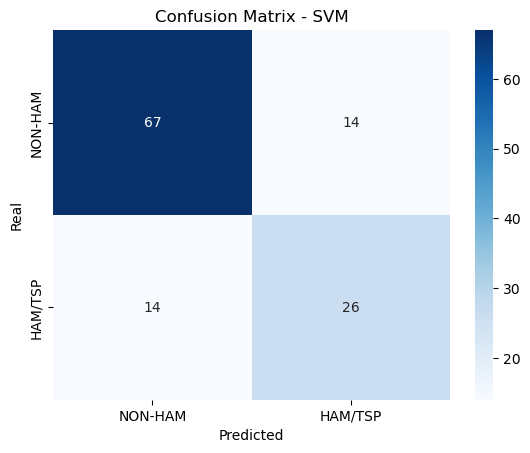

Método de balanceamento desconhecido: TomekLinks()
Predicted labels distribution for KNN: [94 27]


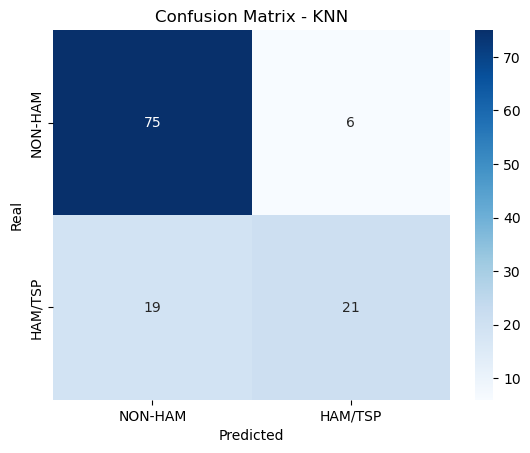

Método de balanceamento desconhecido: TomekLinks()


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

Predicted labels distribution for AB: [88 33]


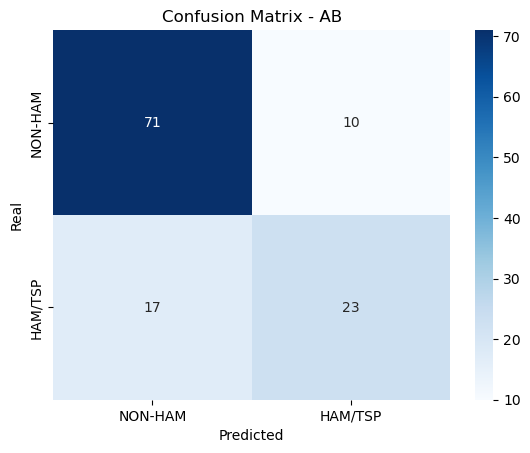

Método de balanceamento desconhecido: TomekLinks()


c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\mathe\anaconda3\envs\ML-2024python3_11_\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to sup

Predicted labels distribution for LSVM: [80 41]


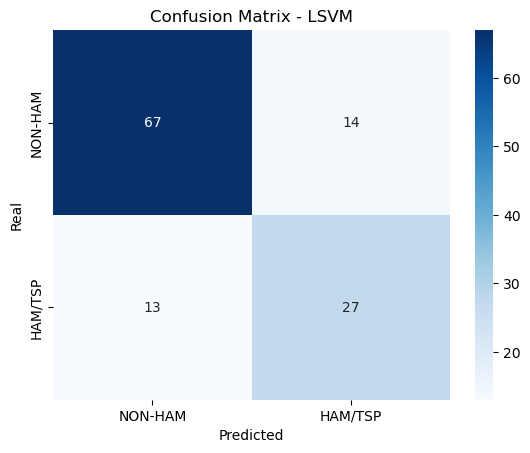

In [ ]:
def get_balancing_method():
    global balancing_method_selected
    if balancing_method_selected == 'Random Over Sampler':
        return RandomOverSampler(random_state=42)
    elif balancing_method_selected == 'ADASYN':
        return ADASYN(random_state=42)
    elif balancing_method_selected == 'Random Under Sampler':
        return RandomUnderSampler(random_state=42)
    elif balancing_method_selected == 'Tomek Links':
        return TomekLinks()
    else:
        print(f"Método de balanceamento desconhecido: {balancing_method_selected}")
        return None

def plot_confusion_matrix(model_name):
    # Select the model
    model = classifiers[model_name]

    # Get the balancing method
    balancing_method = get_balancing_method()

    # Define the pipeline using the balancing method and the classifier
    pipeline = Pipeline([
        ('balancing', balancing_method),  
        ('classifier', model)  
    ])
    
    # Making predictions using cross_val_predict with the pipeline
    y_preds = cross_val_predict(pipeline, X, y, cv=loo)

    # Calculate the confusion matrix
    cm = confusion_matrix(y, y_preds) 
    
    # Print the predicted labels distribution for debugging
    print(f"Predicted labels distribution for {model_name}: {np.bincount(y_preds)}")
    
    # Define custom labels
    labels = ['NON-HAM', 'HAM/TSP']

    # Plot the heat map
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.title(f'Confusion Matrix - {model_name}')
    
    # Save the picture
    plt.savefig(f'../results/{model_name}_confusion_matrix.jpeg')
    plt.show()

# Iterating over each model in classifiers
for model_name in classifiers:
    plot_confusion_matrix(model_name)
